<a href="https://colab.research.google.com/github/selenecarnerocid/Selene-Carnero-Cid/blob/main/student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student preformance:**

The problem of analyzing the performance of high school students in mathematics is very important to understand how well students are learning the subject and how different factors, such as demographics and socioeconomic status, can affect their performance.


So educators can identify areas where additional support may be needed to ensure that all students have an equal opportunity for success.


There are many different aspects of mathematics performance that can be analyzed. Additionally, it is important to consider the context in which students are learning, including factors such as school resources and family support.


Demographic information may also affect, as research has shown that students from low-income families may be less likely to have access to resources.

# **Data description**

This dataset contains information on the performance of high school students in mathematics and it was collected from three high schools.

### **Characteristics:**

***Gender***: The gender of the student (male/female)

***Race/ethnicity***: The student's racial or ethnic background (Asian, African-American, Hispanic, etc.)

***Parental level of education***: The highest level of education attained by the student's parent(s)

***Lunch***: Whether the student receives free or reduced-price lunch (yes/no)

***Test preparation course***: Whether the student completed a test preparation course (yes/no)

***Math score***: The student's score on a standardized mathematics test

***Reading score***: The student's score on a standardized reading test

***Writing score***: The student's score on a standardized writing test

### **Import libraries**

In [ ]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("Setup Complete")

Setup Complete


### **Read dataset and show some information:**

In [ ]:
def read_dataset(file_path):
    data = pd.read_csv(file_path)
    return data

In [ ]:
file_path = '/content/exams.csv'
data = read_dataset(file_path)

In [ ]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [ ]:
data.shape

(1000, 8)

In [ ]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     79
reading score                  71
writing score                  74
dtype: int64

In [ ]:
print('gender: ', data['gender'].unique().tolist())
print('race / ethnicity: ', data['race/ethnicity'].unique().tolist())
print('parental level of education: ', data['parental level of education'].unique().tolist())
print('lunch: ', data['lunch'].unique().tolist())
print('test preparation course: ', data['test preparation course'].unique().tolist())

gender:  ['female', 'male']
race / ethnicity:  ['group D', 'group B', 'group C', 'group E', 'group A']
parental level of education:  ['some college', "associate's degree", 'some high school', "bachelor's degree", "master's degree", 'high school']
lunch:  ['standard', 'free/reduced']
test preparation course:  ['completed', 'none']


In [ ]:
print("The score median is:")
data['average score'] = ((data['math score'] + data['reading score'] + data['writing score']) / 3).round(0)
data['average score'] = data['average score'].astype('int')
data.describe().round(2)

The score median is:


,math score,reading score,writing score,average score
count,1000.00,1000.00,1000.00,1000.00
mean,67.81,70.38,69.14,69.10
std,15.25,14.11,15.03,14.02
min,15.00,25.00,15.00,20.00
25%,58.00,61.00,59.00,59.75
50%,68.00,70.50,70.00,70.00
75%,79.25,80.00,80.00,79.00
max,100.00,100.00,100.00,100.00


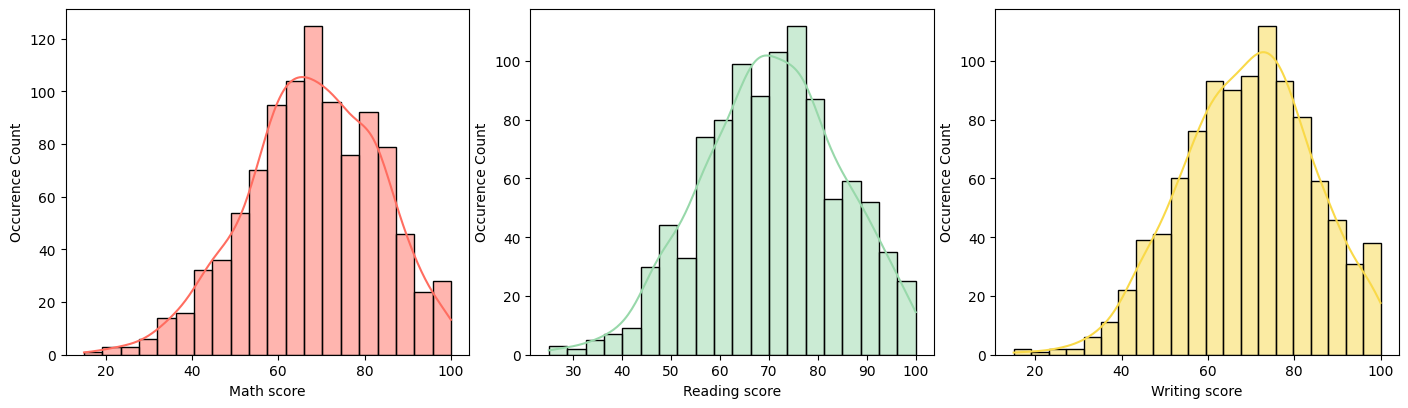

In [ ]:
data=data.copy()
colors=["#FF6D60","#98D8AA","#F9D949"]
# This is gonna select only the score cols
n_cols=data.select_dtypes(include="int64").columns

#Plot Distributions
fig,axs=plt.subplots(1,3,figsize=(14,4))
axs=axs.flat
for colm,ax,color in zip(n_cols,axs,colors):
    sns.histplot(ax=ax,data=data,x=colm,kde=True,color=color)
    ax.set_xlabel(str(colm).capitalize())
    ax.set_ylabel("Occurence Count")


plt.tight_layout(pad=0.4)
plt.show()

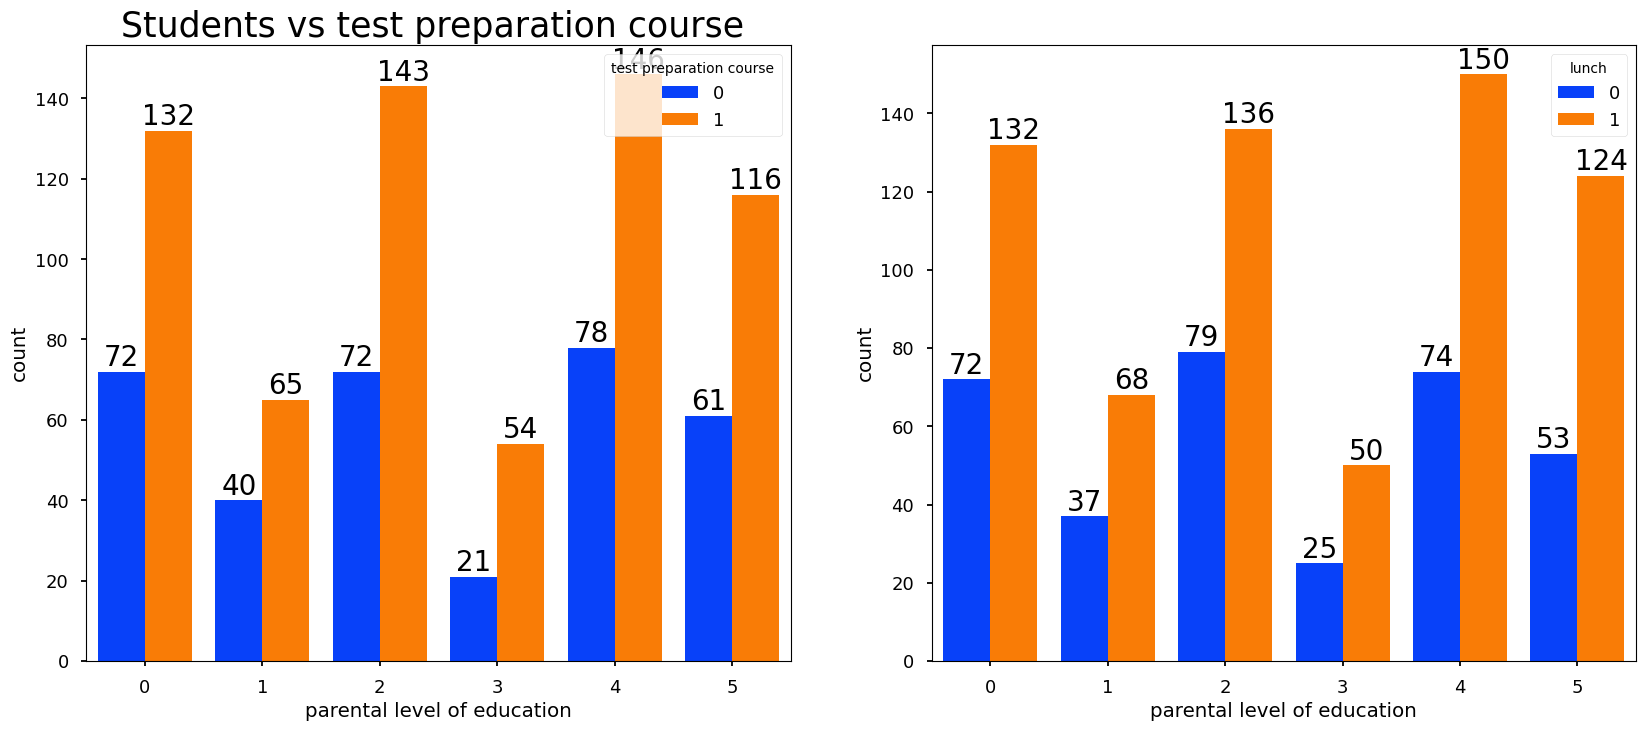

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=data['parental level of education'],data=data,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

sns.countplot(x=data['parental level of education'],data=data,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)

<Axes: xlabel='math score', ylabel='writing score'>

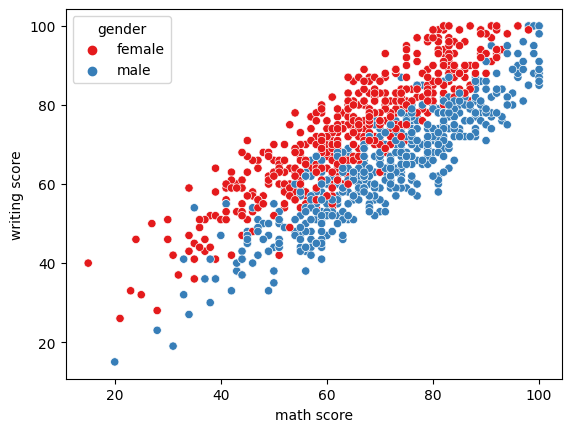

In [ ]:
sns.scatterplot(data=data,x='math score',y='writing score',palette='Set1',hue='gender')
#We can observe and say females are doing better than males here as their regression line would pass easily over the males

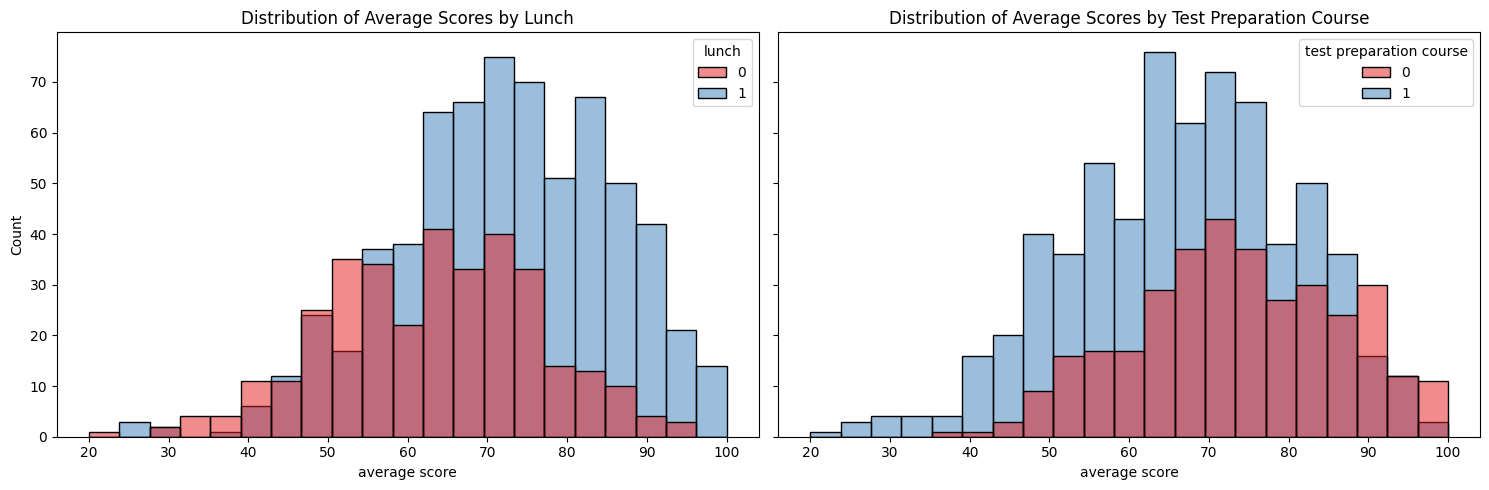

In [ ]:
# Set the color palette
palette = sns.color_palette("pastel")

# Create a figure with three subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True, sharex = True)

# Create the second subplot for the distribution of writing scores
sns.histplot(x="average score", data=data, ax=axs[0],hue = 'lunch', palette="Set1")
axs[0].set_title('Distribution of Average Scores by Lunch')

# Create the third subplot for the distribution of writing scores
sns.histplot(x="average score", data=data, ax=axs[1],hue = 'test preparation course', palette="Set1")
axs[1].set_title('Distribution of Average Scores by Test Preparation Course')

# Increase the distance between subplots
fig.subplots_adjust(wspace=0.5)

# Set the tight layout
plt.tight_layout()

# Display the plot
plt.show()

### **Data preprocessing:**

In [ ]:
# Assign variables
x = data.drop('math score', axis=1)
y = data['math score']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

### **Regresion models:**

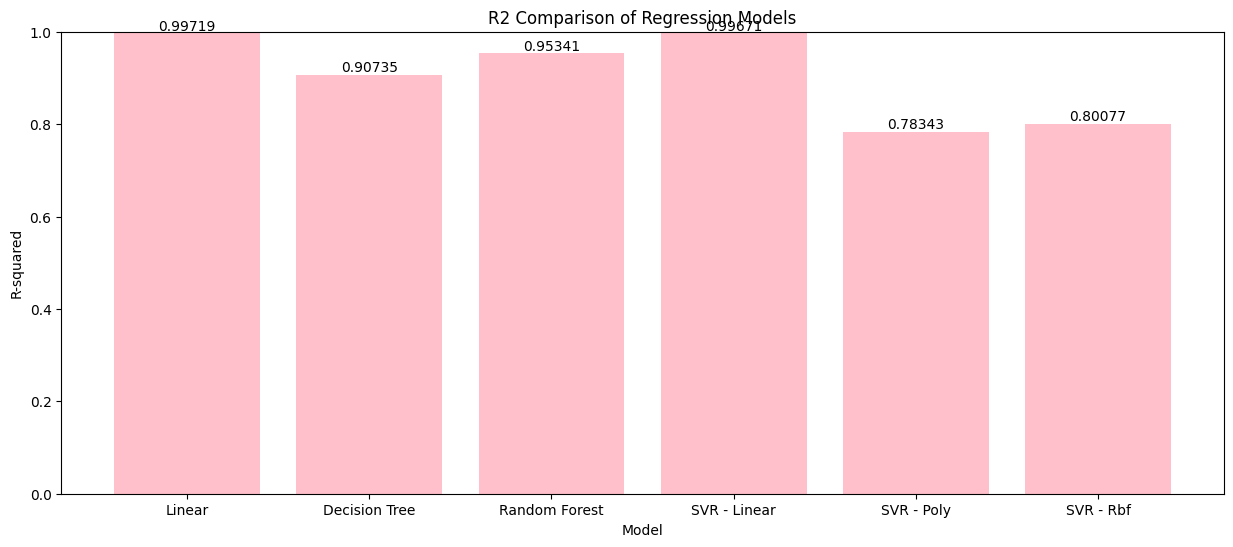

In [ ]:
# Create a list of regression models to compare, selecting the best one
models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), SVR(kernel='linear'), SVR(kernel='poly'), SVR(kernel='rbf')]

# Use cross-validation to compute the R-squared score for each model
cv_scores = []
for model in models:
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='r2', n_jobs=-1)
    cv_scores.append(scores.mean())

# Plot the results
fig, ax = plt.subplots(figsize=(15, 6))
rects = ax.bar(['Linear', 'Decision Tree', 'Random Forest', 'SVR - Linear', 'SVR - Poly', 'SVR - Rbf'], cv_scores, color='pink')
ax.set_ylim(0, 1)
ax.set_title('R2 Comparison of Regression Models')
ax.set_xlabel('Model')
ax.set_ylabel('R-squared')

# Add labels above each bar
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height, f'{height:.5f}', ha='center', va='bottom')

# Show the plot
plt.show()

From above graph, the linear regression model gives us a higher R2 score. So we will use linear regression for our model.

In [ ]:
model = LinearRegression()

# Fit the model using the training data
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Evaluation Metrics')
print("Mean squared error:", mse)
print("Root Mean squared error:", rmse)
print("Mean absolute error:", mae)
print("R-squared score:", r2)

Evaluation Metrics
Mean squared error: 0.6097288612680416
Root Mean squared error: 0.7808513695115362
Mean absolute error: 0.64068092354203
R-squared score: 0.9972137774569849


### The results obtained from the metric evaluation indicate that the linear regression model is very accurate in predicting student grades based on the given characteristics.